In [1]:
!pip install sklearn

In [2]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [3]:
#Loading dataset
wine = pd.read_csv('../winequality-white.csv',delimiter=';')
# ('winequality-red.csv',delimiter=';')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


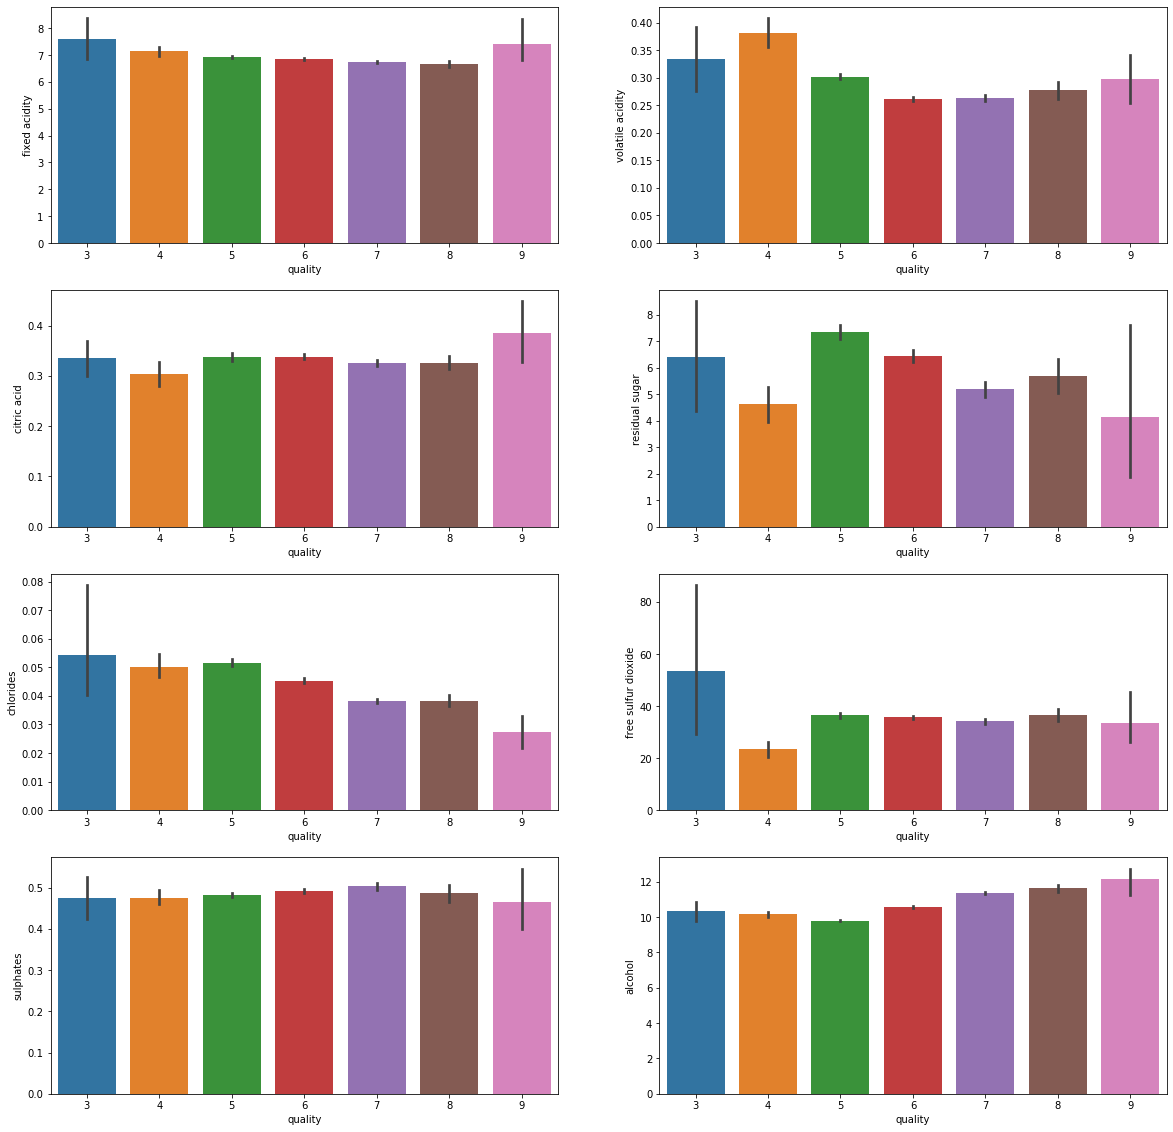

In [5]:
#Here we see that fixed acidity does not give any specification to classify the quality.
plt.figure(figsize = (20,20))
plt.subplot(4, 2, 1)
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
plt.subplot(4, 2, 2)
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)
plt.subplot(4, 2, 3)
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
plt.subplot(4, 2, 4)
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)
plt.subplot(4, 2, 5)
sns.barplot(x = 'quality', y = 'chlorides', data = wine)
plt.subplot(4, 2, 6)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)
plt.subplot(4, 2, 7)
sns.barplot(x = 'quality', y = 'sulphates', data = wine)
plt.subplot(4, 2, 8)
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [6]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [7]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [8]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

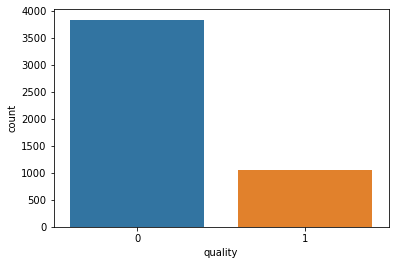

In [9]:
sns.countplot(wine['quality'])

In [10]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [11]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [13]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Support Vector Classifier

In [14]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [15]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       753
           1       0.75      0.34      0.47       227

    accuracy                           0.82       980
   macro avg       0.79      0.65      0.68       980
weighted avg       0.81      0.82      0.79       980



#### 81% accuracy using stochastic gradient descent classifier

In [16]:
print(confusion_matrix(y_test, pred_svc))

[[727  26]
 [150  77]]


## Let's try to increase our accuracy of models
## Grid Search CV

In [17]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [18]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [19]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.1, 'kernel': 'rbf'}

In [20]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       753
           1       0.81      0.51      0.63       227

    accuracy                           0.86       980
   macro avg       0.84      0.74      0.77       980
weighted avg       0.85      0.86      0.85       980



### SVC improves from 81% to 85% using Grid Search CV